# 환경부 보도자료 분석 (튜토리얼 형태 Ver)
https://github.com/dyjin1217/2019_NFSI_Text_Mining

## 관련 라이브러리 import
- https://github.com/lovit/customized_konlpy
- pip install customized_konlpy
- pip install textrankr

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

In [5]:
import re
import gensim 
import mglearn
import numpy as np
import pandas as pd
import os

In [6]:
import konlpy

In [7]:
from konlpy.utils import pprint
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.gensim
import pyLDAvis.sklearn
import collections
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from gensim.models.word2vec import Word2Vec
# from eunjeon import Mecab  # KoNLPy style mecab wrapper, Win환경에서는 구동되지 않음
import copy
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
#from textrankr import TextRank

# 명사인식
import soynlp
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2

plt.rc('font', family='NanumBarunGothicOTF')

# 8장 자연어처리시작하기
## 8-2. 한글 자연어 처리 기초

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [9]:
from konlpy.tag import Kkma
kkma =Kkma()

TypeError: startJVM() got an unexpected keyword argument 'convertStrings'

In [10]:
from konlpy.tag import Hannanum
hannanum =Hannanum()

TypeError: startJVM() got an unexpected keyword argument 'convertStrings'

In [11]:
from konlpy.tag import Twitter
from konlpy.tag import Twitter
twitter = Twitter()

TypeError: startJVM() got an unexpected keyword argument 'convertStrings'

In [12]:
texts = '조국 전 법무부 장관의 가족비리·감찰무마 의혹과 청와대 하명수사·선거개입 의혹 수사를 지휘한 일선 검찰청 차장검사 3명이 모두 교체됐다.'

In [13]:
kkma.sentences('한국어 분석을 시작합니다. 재미있어요~~')
hannanum.morphs('한국어 분석을 시작합니다. 재미있어요~~')
twitter.morphs('한국어 분석을 시작합니다')

NameError: name 'kkma' is not defined

In [14]:
kkma.nouns('한국어 분석을 시작합니다. 재미있어요~~')
hannanum.nouns('한국어 분석을 시작합니다')
twitter.nouns('한국어 분석을 시작합니다')

NameError: name 'kkma' is not defined

In [22]:
kkma.pos('한국어 분석을 시작합니다. 재미있어요~~') # 형태소분석
hannanum.pos('한국어 분석을 시작합니다')
twitter.pos('한국어 분석을 시작합니다')

NameError: name 'kkma' is not defined

## 8-3. 워드 구름

In [23]:
from wordcolud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcolud'

In [24]:
import numpy as np
from PIL import Image

In [25]:
from wordcloud import WordCloud

In [26]:
from nltk.corpus import stopwords
# from stop_words import get_stop_words # pip install stopwords, pip install stop-words

text = open('../data/09. alice.txt').read()
alice_mask = np.array(Image.open('../data/09. alice_mask.png'))
stopwords = set(stopwords.words('english'))

C:\ProgramData\Anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
C:\ProgramData\Anaconda3\lib\site-packages\nltk\lm\counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict


In [27]:
stopwords.add('said')

In [28]:
import matplotlib.pyplot as plt
import platform

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

if platform.system() == 'Darwin' :
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows' :
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unkown system... sorry~~~~')

%matplotlib inline

'C:\\Users\\NFSI291\\2019_NFSI_Text_Mining\\보도자료_분석'

<Figure size 360x360 with 0 Axes>

(-0.5, 224.5, 224.5, -0.5)

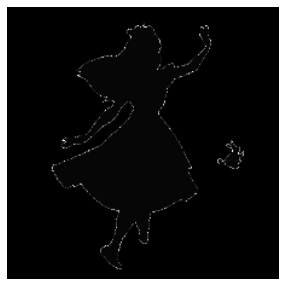

In [29]:
%pwd
plt.figure(figsize=(5,5))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [30]:
wc = WordCloud(background_color = 'white', max_words=2000, mask=alice_mask, stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29916897506925205,
 'one': 0.2631578947368421,
 'know': 0.24930747922437674,
 'like': 0.23822714681440443,
 'would': 0.2299168975069252,
 'went': 0.2299168975069252,
 'thing': 0.22160664819944598,
 'could': 0.21329639889196675,
 'time': 0.21329639889196675,
 'Queen': 0.21052631578947367,
 'see': 0.18559556786703602,
 'King': 0.1772853185595568,
 'began': 0.16066481994459833,
 'way': 0.15789473684210525,
 'Hatter': 0.15789473684210525,
 'head': 0.15512465373961218,
 'Mock Turtle': 0.15512465373961218,
 'say': 0.1523545706371191,
 'Gryphon': 0.1523545706371191,
 'well': 0.14958448753462603,
 'think': 0.14681440443213298,
 'quite': 0.1440443213296399,
 'much': 0.14127423822714683,
 'first': 0.14127423822714683,
 'go': 0.13850415512465375,
 'thought': 0.13573407202216067,
 'come': 0.1329639889196676,
 'never': 0.13019390581717452,
 'get': 0.12742382271468145,
 "I'm": 0.12742382271468145,
 'voice': 0.12742382271468145,
 'looked': 0.12465373961218837,
 'must': 0.1

In [31]:
alice_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [32]:
wc

<Figure size 360x360 with 0 Axes>

(-0.5, 224.5, 224.5, -0.5)

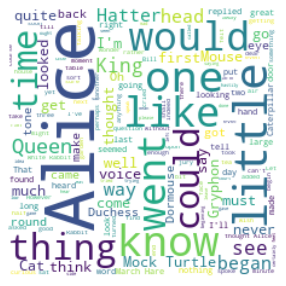

In [33]:
plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 8-4. 육아 휴직 관련법안

In [34]:
import nltk

In [35]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [36]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [37]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

TypeError: startJVM() got an unexpected keyword argument 'convertStrings'

In [38]:
len(tokens_ko)
len(set(tokens_ko))

NameError: name 'tokens_ko' is not defined

In [39]:
ko = nltk.Text(tokens_ko, name= '대한민국 국회 의안 제 1809890호')

len(ko.tokens)
len(set(ko.tokens))

ko.vocab()

NameError: name 'tokens_ko' is not defined

In [40]:
plt.figure(figsize =(15,5))
ko.plot(50)
plt.show()

<Figure size 1080x360 with 0 Axes>

NameError: name 'ko' is not defined

<Figure size 1080x360 with 0 Axes>

In [41]:
ko

NameError: name 'ko' is not defined

In [42]:
stop_words = ['.', '(', ')', ',', '%', '-', 'X', ').', 'x', '의', '을', '다', '만', '로', '가', '를']
ko = [ each_word for each_word in ko if each_word not in stop_words]

NameError: name 'ko' is not defined

In [43]:
ko = nltk.Text(ko, name= '대한민국 국회 의안 제 1809890호')
plt.figure(figsize =(15,5))
ko.plot(50)
plt.show()

NameError: name 'ko' is not defined

In [149]:
ko.count('초등학교')
ko.concordance('초등학교')

6

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
정 법률 안 지방공무원법 일부 다음 개정 제 항제 호 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
 호 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 이 법 공포 날 시행 신 구조 문대비 
 다만 제 호 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


<Figure size 864x432 with 0 Axes>

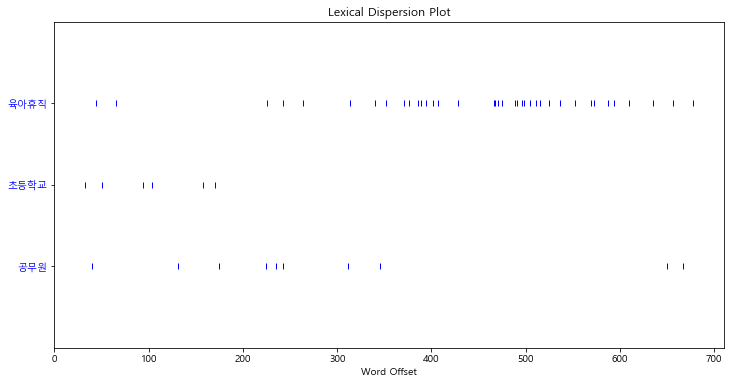

In [143]:
plt.figure(figsize =(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [152]:
from nltk import collocations
collocations.BigramCollocationFinder.from_words(ko)

In [153]:
ko.collocations()

ValueError: too many values to unpack (expected 2)

<Figure size 864x576 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

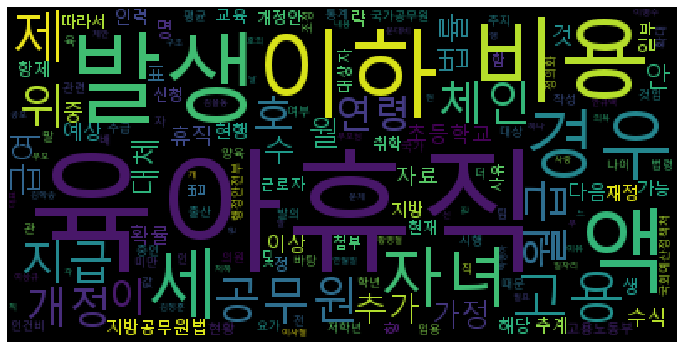

In [156]:
data = ko.vocab().most_common(150)

wordcolud = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf').generate_from_frequencies(dict(data))
#wc = WordCloud(background_color = 'white', max_words=2000, mask=alice_mask, stopwords = stopwords)

plt.figure(figsize=(12,8))
plt.imshow(wordcolud)
plt.axis('off')
plt.show()

## 8-5. GNB

In [157]:
from nltk.tokenize import word_tokenize
import nltk

In [160]:
train = [('i like you', 'pos'), ('i hate you', 'neg'), ('you like me', 'neg'), ('i like her', 'pos')]
train

[('i like you', 'pos'),
 ('i hate you', 'neg'),
 ('you like me', 'neg'),
 ('i like her', 'pos')]

조금 복잡하지만 for문을 2개 이상 사용하는 것도 가능하다. for문을 여러 개 사용할 때의 문법은 다음과 같다.

In [185]:
for x in range(1,3) :
    for y in range(4,7):
        x*y
        
[x*y for x in range(1,3) for y in range(4, 7)]

4

5

6

8

10

12

[4, 5, 6, 8, 10, 12]

In [194]:
for sentence in train :
    sentence
    sentence[0]
    for word in word_tokenize(sentence[0]) :
        word
        word.lower()
    

('i like you', 'pos')

'i like you'

'i'

'i'

'like'

'like'

'you'

'you'

('i hate you', 'neg')

'i hate you'

'i'

'i'

'hate'

'hate'

'you'

'you'

('you like me', 'neg')

'you like me'

'you'

'you'

'like'

'like'

'me'

'me'

('i like her', 'pos')

'i like her'

'i'

'i'

'like'

'like'

'her'

'her'

In [196]:
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

## 인덱스 파일 로드 
- ./data/indexing.txt : 인덱싱 파일
- ./data/*.txt : 그외 파일은 기사 제목 및 내용

In [44]:
dir_path = './data/'

idx_result_df = pd.read_csv(dir_path + 'indexing.txt',encoding="UTF8",header=None)
idx_result_df.columns = ['date','title','content_url_list','file_list']

# 인덱스 파일 날짜로 정렬
idx_result_df = idx_result_df.sort_values('date')

# 제목이 같은 항목 삭제 및 마지막 레코드만 남김
idx_result_df = idx_result_df.drop_duplicates(subset=['date','title'],keep="last")

# 인덱스 파일 인덱스 정리
idx_result_df = idx_result_df.reset_index(drop=True)

#idx_result_df

## 결과저장 디렉토리 생성

In [45]:
dirname = './result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './noun_recognition'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')  
    
    
dirname = './lda_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './doc_trend_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './keyword_frequency_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './keyword_frequency_yearly_basis_result/'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')   

dirname = './keyword_trend_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './lda_stat'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')    

dirname = './lda_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './sentence_level_cowords'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './doc_level_cowords'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './w2v_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')

dirname = './filtered_sentence_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')    

dirname = './sentence_summary_result'
if ((os.path.isdir('./' + dirname + '/')) == False):
    os.mkdir('./' + dirname + '/')  

##  형태소 분석기 설정 : Customized 트위터 분석기 사용함
- from ckonlpy.tag import Twitter : 명사 추가 기능이 추가된 트위터 분석기

In [46]:
twitter = Twitter()
#mecab = Mecab()

TypeError: startJVM() got an unexpected keyword argument 'convertStrings'

In [47]:
#twitter.pos('아버지가 방에 들어가신다.')
twitter.nouns('아버지가 방에 들어가신다.')
#mecab.pos('아버지가 방에 들어가신다')

NameError: name 'twitter' is not defined

## 분석 범위 설정 1 : 날짜 필터링 

- 시작 날짜 및 끝 날짜 설정 필요

In [48]:
# 시작 날짜 및 끝 날짜 설정
start_date = '2015-01-01'
end_date = '2018-12-31'

idx_result_df['date'] = pd.to_datetime(idx_result_df['date'])
# 날짜에 해당하는 인덱스 내용만 추출

dt_idx = (idx_result_df['date'] >= start_date) & (idx_result_df['date'] <= end_date)

filtered_idx_result_df = idx_result_df.loc[dt_idx]
filtered_idx_result_df = filtered_idx_result_df.reset_index(drop=True)

#filtered_idx_result_df

## 분석 범위 설정 2 : 내용 기반 필터링
- 정규표현식 기반 문자열 매칭 방식 (예를 들어 '미세먼지'로 필터링을 할경우 '초미세먼지'의 경우에도 '미세먼지' 글자를 포함하므로 필터링에 포함
- 전체 문서에서 필요없는 문서 제거(is_del = True) 하거나 특정단어가 들어간 문서만 활용(is_del=False) 설정
- 생략할경우 전체문서 사용

In [49]:
# is_del = True : 특정단어가 들어간 문서제거, is_del = False : 특정단어가 들어간 문서만 활용

is_del = True

# 정규표현식 
rexp = "인사발령|공개모집|필기시험|발령|인사 발령|과장|전보 일자|공무원|대변인|국장|승진|공모전|캠프 캐롤|고엽제 매립"


# 정규표현식 기반 문서 필터링

file_list = filtered_idx_result_df['file_list'].tolist()

fidx = []
didx = []

# 각 파일 문서 내용 체크 및 필터링
for i,fn in enumerate(file_list):
    
    # 각 파일 읽기
    f = open(fn, 'r',encoding='utf-8',errors="ignore")
    
    # 파일을 읽어서 doc변수에 문서내용 저장
    doc = f.read()
    f.close()
    
    # 정규표현식 활용 문서 내용 체크
    p = re.compile(rexp)
    ridx = p.search(doc)

    if(ridx == None):
        didx.append(i)
    else:
        fidx.append(i)

# 삭제하는 경우
if is_del == True:  
    filtered_idx_result_df = filtered_idx_result_df.loc[didx]
    filtered_idx_result_df = filtered_idx_result_df.reset_index(drop=True)
    
# 추가하는 경우
else :
    filtered_idx_result_df = filtered_idx_result_df.loc[fidx]
    filtered_idx_result_df = filtered_idx_result_df.reset_index(drop=True)   
    
# filtered_idx_result_df

## 명사인식 및 명사 추출 (생략 가능)
- Out of Vocabuluary Problem
- 참고: 서울대학교 산업공학과 김형중 박사 구현 라이브러리(soynlp), 상세사항은 https://github.com/lovit/soynlp 참조)
- 코퍼스가 너무 큰 경우에는 사용이 어려움 (한개의 데이터 프레임이 모든 내용을 넣기 때문임, 문서를 나누어서 실행 등의 방법 필요
- (예) 네이버 뉴스 20만건 등)

In [50]:
# 명사 인식을 위한 사전 준비

corpus = [] 

file_list = idx_result_df['file_list'].tolist()

for fn in file_list:
    f = open(fn, 'r',encoding='utf-8',errors="ignore")
    
    # 파일을 읽어서 doc변수에 문서내용 저장
    doc = f.read()
    doc = doc.replace("\n","")
    corpus.append("".join(doc))

corpus = pd.DataFrame(corpus)
corpus_fname = './noun_recognition/corpus.txt'
corpus.to_csv(corpus_fname, sep=" ",header=None)

sents = DoublespaceLineCorpus(corpus_fname, iter_sent=True)

# 명사 인식기 생성
noun_extractor = LRNounExtractor_v2(verbose=True,max_left_length=30, min_num_of_features=20)

# 명사 인식기 학습
noun_extractor.train(sents)

# 명사추출
nouns = noun_extractor.extract(min_noun_frequency=10)
nouns = list(nouns.keys())
noun_list = []

# 특수문자 제거 및 불용어 제거 (각 명사에 대해)
for w in list(nouns):
    w = re.sub('\'', '', w)
    w = re.sub('\「', '', w)
    w = re.sub('\」', '', w)
    w = re.sub(' ', '', w)
    if(("." in w) | w.endswith("?")):
        pass
    else:
        noun_list.append(w.replace('\"', ''))
        
# 팔요시 파일로 저장, 잘못 인식된 단어가 많으므로 수작업을 통해 필요한 단어 정리 필요
nouns_df = pd.DataFrame(noun_list)
nouns_df.to_csv("./noun_recognition/nouns.csv",sep=" ", header=None, index=None)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 565980 from 10524 sents. mem=0.308 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=3023973, mem=1.909 Gb
[Noun Extractor] batch prediction was completed for 173225 words
[Noun Extractor] checked compounds. discovered 108453 compounds
[Noun Extractor] postprocessing detaching_features : 17154 -> 17089
[Noun Extractor] postprocessing ignore_features : 17089 -> 16972
[Noun Extractor] postprocessing ignore_NJ : 16972 -> 16826
[Noun Extractor] 16826 nouns (108453 compounds) with min frequency=10
[Noun Extractor] flushing was done. mem=2.231 Gb                    
[Noun Extractor] 80.46 % eojeols are covered


In [51]:
nouns_df

,0
0,Pre-Qualification)
1,굴뚝원격감시체계(CleanSYS)
2,한국환경정책·평가연구원(KEI)
3,유엔기후변화협약(UNFCCC)
4,한국환경정책평가연구원(KEI)
...,...
16404,∙
16405,②
16406,①
16407,또


## 명사인식 및 명사 추출 (생략 가능, 수작업을 통해 필요한 단어 정리 후)

In [20]:
# 정제된 명사 파일을 로드후 형태소 분석기 사전에 넣기 (연구자가 추가할 단어 선정후 refined.nouns.csv 파일로 저장하였음)

nouns_df = pd.read_csv("./noun_recognition/refined_nouns.csv",header=None)
nouns = nouns_df[0].tolist()
#twitter.add_dictionary(nouns, 'Noun')

## 키워드 빈도수 분석

In [21]:
# 옵션 설정 
# is_tfidf = False (단순빈도수), is_tfidf = Ture (TF-IDF 사용)

is_tfidf = True
num = 50

corpus = []

file_list = filtered_idx_result_df['file_list'].tolist()

for fn in file_list:

    f = open(fn, 'r',encoding='utf-8',errors="ignore")
    doc = f.read()
    corpus.append(" ".join(twitter.nouns(doc)))

# Stop word 설정
stop_words = ["전략", "연구", "평가", "마련", "조사", "관리", "보다", "관련","전문가","예정","이번","환경부", "환경", "기술", "사업", "산업", "기업","우리나라", "또한",
            "총회", "대한", "통해", "한국","국내","개최","행사","우수","장관","피해","해외","일자리","박람회", "지원", "위해", "총회","국제","분야","물의","세계",
            "환경과학","국립","시민","통합"]

stop_words = list(set(stop_words))

# ngram_range를 (1,2)를 사용할 경우 unigram 및 bigram 혼합 활용
vect = CountVectorizer(stop_words = stop_words,ngram_range=(1, 2),min_df=0.005,max_df=0.3)

# Doc-Term Matrix 계산
X = vect.fit_transform(corpus)
X = TfidfTransformer().fit_transform(X)

# 저장 파일 이름 설정
fn = "./keyword_frequency_result/KF_"
if is_tfidf == True:
    fn = fn + "norm_TF.txt"
else :
    fn = fn + "_TF.txt"

# Doc-Term Matrix 각 단어에 대한 합
count = X.toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]

feature_name = np.array(vect.get_feature_names())[idx]

keyword_list = list(zip(feature_name[:num], count[:num]))

result_df = pd.DataFrame(keyword_list)
# result_df.to_csv(fn,header=None)
# result

In [22]:
result_df

,0,1
0,국립공원,70.155917
1,생물,54.100907
2,국립생태원,32.179188
3,생태,30.935300
4,시설,30.332304
5,공단,30.097510
6,자원,29.162262
7,배출,29.010329
8,제품,25.485954
9,안전,25.429713


## 연도별 키워드 빈도수 분석
- 연도별로 나누어서 주요 키워드 출력
- 시작년도, 끝년도 지정

In [23]:
# 시작년도, 끝년도 지정
start_year = 2015
end_year = 2018
num = 500
file_list = filtered_idx_result_df['file_list'].tolist()

corpus = [""] * len(file_list)

result_df = pd.DataFrame()

# 녇도별 문서 추출 후 키워드 빈도수 분석

for year in range(int(start_year),int(end_year)+1):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_index = (filtered_idx_result_df['date'] >= start_date) & (filtered_idx_result_df['date'] <= end_date)
    temp_filtered_idx_result_df = filtered_idx_result_df[dt_index]
    file_list = temp_filtered_idx_result_df['file_list'].tolist()

    for i in range(len(file_list)):
        f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
        doc = f.read()
        f.close()
        corpus[i] = " ".join(twitter.nouns(doc))


    stop_words = ["전략", "연구", "평가", "마련", "조사", "관리", "보다", "관련","전문가","예정","이번","환경부", "환경", "기술", "사업", "산업", "기업","우리나라", "또한",
            "총회", "대한", "통해", "한국","국내","개최","행사","우수","장관","피해","해외","일자리","박람회", "지원", "위해", "총회","국제","분야","물의","세계",
            "환경과학","국립","시민","통합","까지"]

    stop_words = list(set(stop_words))


    vect = CountVectorizer(stop_words = stop_words,ngram_range=(1, 2),min_df=0.005,max_df=0.5)
    X = vect.fit_transform(corpus)
    if(is_tfidf == True):
        X = TfidfTransformer().fit_transform(X)
        
    count = X.toarray().sum(axis=0)
    idx = np.argsort(-count)
    count = count[idx]

    feature_name = np.array(vect.get_feature_names())[idx]

    result = list(zip(feature_name[:num], count[:num]))
    result = pd.DataFrame(result)
    result.columns=[str(year) + ' 키워드','빈도수']
    result_df = pd.concat([result_df,result],axis=1)

    
# 저장 파일 이름 설정

fn = "./keyword_frequency_yearly_basis_result/KF_yearly_TF_"
if is_tfidf == True:
    fn = fn + "norm_TF.txt"
else :
    fn = fn + "_TF.txt"
    
result_df.to_csv(fn,encoding="UTF8")

## 연도별 키워드 특정 키워드 트랜드 분석
- 연도별로 나누어서 주요 키워드 트랜드 출력
- 시작년도, 끝년도 지정

In [68]:
# 시작년도, 끝년도 지정
start_year = 2015
end_year = 2018
num = 500
file_list = filtered_idx_result_df['file_list'].tolist()


result_df = pd.DataFrame()
keyword_list = ['친환경','미세먼지','쓰레기']

# 녇도별 문서 추출 후 키워드 빈도수 분석

    
result_df = pd.DataFrame()
result_df2  = pd.DataFrame()

for year in range(int(start_year),int(end_year)+1):
    print(year)
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_idx = (filtered_idx_result_df['date'] >= start_date) & (filtered_idx_result_df['date'] <= end_date)
    temp_filtered_idx_result_df = filtered_idx_result_df[dt_idx]
    s_ndocs = temp_filtered_idx_result_df.shape[0]
    file_list = temp_filtered_idx_result_df['file_list'].tolist()

    for i in range(len(file_list)):
        f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
        doc = f.read()
        f.close()
        corpus[i] = doc
    
    s_corpus_str = "".join(corpus)

    
    result_list = []
    result_list2 = []

    for k in keyword_list:
        result_list.append(s_corpus_str.count(k))  
        result_list2.append(s_corpus_str.count(k) / (s_ndocs+1))  
        
    temp_df = pd.DataFrame(result_list,columns=[str(year)])
    temp_df2 = pd.DataFrame(result_list2,columns=[str(year)])
    
    result_df = pd.concat([result_df,temp_df],axis=1)
    result_df2 = pd.concat([result_df2,temp_df2],axis=1)
    
result_df.index=  keyword_list
result_df
result_df2.index=  keyword_list
result_df2

2015
2016
2017
2018


,2015,2016,2017,2018
친환경,0.737265,0.898123,0.571754,0.542857
미세먼지,0.595174,0.571046,0.665148,1.306122
쓰레기,0.136729,0.136729,0.052392,0.089796


In [25]:
result_df

,2015 키워드,빈도수,2016 키워드,빈도수,2017 키워드,빈도수,2018 키워드,빈도수
0,국립공원,21.143649,국립공원,26.169889,국립공원,27.400513,국립공원,26.467046
1,생물,17.906115,생물,21.637219,생물,22.542176,생물,17.089152
2,시설,14.255000,계획,13.442482,국립생태원,16.641167,계획,16.692910
3,계획,11.206620,지역,12.796866,지역,14.132076,미세먼지,15.369576
4,공단,11.108979,자원,12.091748,생태,13.689286,지역,15.071264
...,...,...,...,...,...,...,...,...
495,발간,1.525294,청사,1.519918,순환,1.779309,집단,1.963810
496,이전,1.522407,처리 시설,1.518557,워크숍,1.777599,기획,1.963657
497,처리 시설,1.518283,월악산,1.515177,상수도,1.776748,리움,1.963501
498,원장 김용주,1.515044,개방,1.514014,의결,1.772255,부장,1.963283


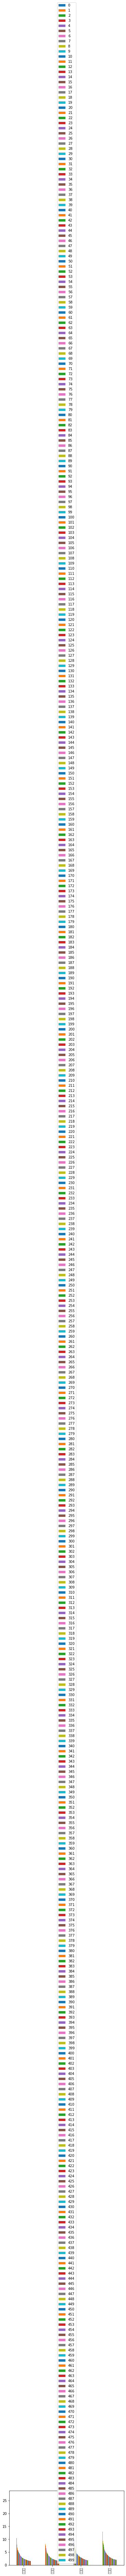

In [27]:
# 막대그래프
result_df['빈도수'].T.plot.bar()

# 라인그래프
#result_df.T.plot.line()

## 특정 키워드 빈도수 및 트랜드 (그래프) : 특정 키워드 포함 문서 빈도수 및 트랜드 (그래프)
- keywords : 조사할 키워드 목록

In [96]:
# 시작년도, 끝년도 지정
start_year = 2015
end_year = 2018
num = 500
file_list = filtered_idx_result_df['file_list'].tolist()

result_df = pd.DataFrame()
result_df2 = pd.DataFrame()
keyword_list = ['친환경','초미세먼지','쓰레기']

for year in range(int(start_year),int(end_year)+1):
    result_list = [0]*len(keyword_list)
    result_list2 = [0]*len(keyword_list)
    
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_idx = (filtered_idx_result_df['date'] >= start_date) & (filtered_idx_result_df['date'] <= end_date)
    temp_filtered_idx_result_df = filtered_idx_result_df[dt_idx]
    
    s_ndocs = temp_filtered_idx_result_df.shape[0]
    file_list = temp_filtered_idx_result_df['file_list'].tolist()

    for i in range(len(file_list)):
        f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
        doc = f.read()
        f.close()
        corpus[i] = doc
        
        for kidx,k in enumerate(keywords):
            p = re.compile(k)
            ridx = p.search(doc)
            if(ridx != None):
                result_list[kidx] =  result_list[kidx] + 1
                result_list2[kidx] =  result_list2[kidx] + 1
                
    result_list2 = list(map(lambda x: x / (s_ndocs+1), result_list2))
    temp_df = pd.DataFrame(result_list,columns=[str(year)])
    temp_df2 = pd.DataFrame(result_list2,columns=[str(year)])
    
    result_df = pd.concat([result_df,temp_df],axis=1)
    result_df2 = pd.concat([result_df2,temp_df2],axis=1)
    
result_df.index=  keyword_list
result_df
result_df2.index=  keyword_list
result_df2

,2015,2016,2017,2018
친환경,0.136729,0.168901,0.125285,0.169388
초미세먼지,0.061662,0.056300,0.107062,0.144898
쓰레기,0.026810,0.034853,0.022779,0.046939


C:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumbarungothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


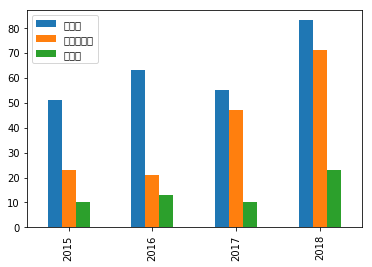

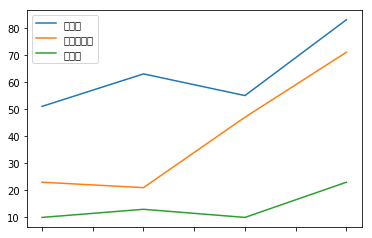

In [99]:
# 막대그래프
result_df.T.plot.bar()

# 라인그래프
result_df.T.plot.line()

## LDA 분석 : 토픽 모델링 분석
- topic_words 변수를 통해 각 주제별 단어 확인 가능

In [101]:
# 인자 설정
# Random Seed 값 설정, 이값에 따라 결과 달라짐
# 토픽 갯수, 리스트 타입으로 한번에 설정 [5,6,7] 등 한번에 실행도 가능

n_topics = [7]
random_seed = 1004
n_words = 50

file_list = filtered_idx_result_df['file_list'].tolist()
corpus = [""] * len(file_list)

# 파일 내용 읽어서 코퍼스에 저장

for i in range(len(file_list)):
    f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
    doc = f.read()
    f.close()
    corpus[i] = " ".join(twitter.nouns(doc))

# Stop words 
stop_words = ["전략", "연구", "평가", "마련", "조사", "관리", "보다", "분석", "구축","개발","정책","대책",
              "관련","전문가","예정","이번","환경부", "환경", "기술", "사업", "산업", "기업","우리나라", "또한",
              "총회", "대한", "통해", "한국","국내","개최","행사","우수","서울","장관","호남권","피해","해외","일자리","박람회",
              "지원", "위해", "총회","국제","분야","환경기술"]

stop_words = list(set(stop_words))

vect = CountVectorizer(stop_words = stop_words,ngram_range=(1, 1),min_df=0.05,max_df=0.3)
X = vect.fit_transform(corpus)
X = TfidfTransformer().fit_transform(X)


for i in n_topics:
        
    # LDA 수횅
    lda = LatentDirichletAllocation(n_components = i,learning_method="batch",random_state=random_seed)
    document_topics = lda.fit_transform(X)

    sorting = np.argsort(lda.components_, axis=1)[:,::-1]
    feature_names = np.array(vect.get_feature_names())

    # 각 문서별 주제번호 할당
    topic_list = np.argmax(document_topics,axis=1).tolist()

    topic_words = pd.DataFrame(feature_names[sorting])
    topic_words = topic_words.T
    topic_words = topic_words[:n_words]

    # 파일경로 지정
    fpath =  "./lda_result/"  + "lda_result_n_" + str(i) + "_" + str(random_seed) + "_"

    # 파일 저장
    document_topics = pd.DataFrame(document_topics)
    document_topics.to_csv(fpath + "document_topic.csv",header=None,index=False,encoding="UTF8")
    topic_words.to_csv(fpath + "topic_words.csv",header=None,index=False,encoding="UTF8")

    # 시각화 및 저장
    pyldavis = pyLDAvis.sklearn.prepare(lda, X, vect)
    pyLDAvis.save_html(pyldavis,fpath + "lda.html")


C:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


## LDA 연도별 추세 : 토픽 모델링 분포 분석
- 앞에서 topic_list 에는 각 문서의 주제 번호가 할당되어있음

In [131]:
# LDA 년도별 문서 분포 결과 출력

topic_list = pd.Series(topic_list)
result_df = pd.DataFrame()

for year in range(int(start_year),int(end_year)+1):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_idx = (filtered_idx_result_df['date'] >= start_date) & (filtered_idx_result_df['date'] <= end_date)
    sub_filtered_idx_result_df = filtered_idx_result_df[dt_idx]
    sub_topic_list = topic_list[dt_idx]
    
    result = []
    for t in range(max(topic_list) + 1):
        num = len(sub_topic_list[sub_topic_list==t])
        result.append(num)
    
    result = pd.Series(result,name=str(year))
    result_df = pd.concat([result_df,result],axis=1)            


# 비율로 만들기
result_df = result_df.T.apply(lambda x: x / x.sum(),axis=1)

In [132]:
result_df

,0,1,2,3,4,5,6
2015,0.166667,0.169355,0.456989,0.002688,0.021505,0.110215,0.072581
2016,0.155914,0.161290,0.438172,0.005376,0.051075,0.104839,0.083333
2017,0.237443,0.155251,0.358447,0.015982,0.061644,0.066210,0.105023
2018,0.167689,0.147239,0.402863,0.024540,0.032720,0.094070,0.130879


## LDA 토픽 비율 그래프 그리기
- https://dailyheumsi.tistory.com/98 참조

C:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumbarungothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


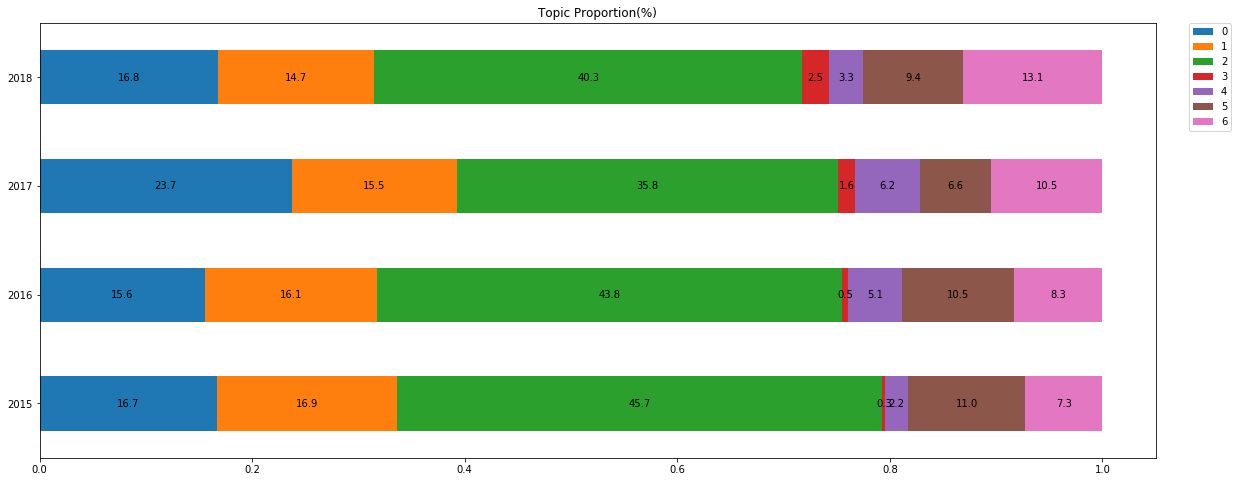

In [133]:
ax = result_df.plot.barh(stacked=True,legend=False,figsize=(20, 8), title="Topic Proportion(%)")
ax.legend(bbox_to_anchor=(1.03, 1),loc=2, borderaxespad=0.)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')

## 연관 키워드 분석 (4가지 방법)
- 예시로 '친환경' 관련 연관 키워드 분석

In [134]:
# Word2vec 학습

file_list = filtered_idx_result_df['file_list'].tolist()
corpus = [""] * len(file_list)

# 파일 내용 읽어서 코퍼스에 저장
for i in range(len(file_list)):
    #print(i)
    f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
    doc = f.read()
    f.close()
    doc = re.sub('[^가-힝0-9a-zA-Z\\s]', '', doc)
    temp = twitter.nouns(doc)
    
    # 1글자 단어 제거
    widx_list = list(map(lambda x : len(x) > 1 ,temp))
    corpus[i] = list(np.array(temp)[widx_list])

model = Word2Vec(corpus)
model.init_sims(replace=True)
w2v_model = model

In [135]:
# 연관 키워드 분석을 수행할 단어 설정 
word = '친환경'
num = 30

## 연관 키워드 분석 1 : word2vec cosine similarity

In [136]:
result = pd.DataFrame(w2v_model.most_similar(word,topn=num))
result.to_csv("./w2v_result/" + "w2v_" + str(word) + ".csv",encoding="UTF8")
#reuslt

## 연관 키워드 분석 2 : 연관 단어가 특정단어 근처에서 나타날 확률

In [138]:
# 반드시 리스트 타입 사용
result2 = pd.DataFrame(w2v_model.predict_output_word([word], topn=num))
result2.to_csv("./w2v_result/" + "w2v2_"+ str(word) +  ".csv",encoding="UTF8")
#result2

## 연관 키워드 분석 3 : 키워드 포함 문장 추출 ⇒ 키워드 빈도수 분석

In [140]:
kkma = Kkma()
kkma.pos('')

[]

In [141]:
# 문장 최소길이
slen = 10

# 리스트 타입 사용

file_list = filtered_idx_result_df['file_list'].tolist()
filtered_sentences= []

for i in range(len(file_list)):
    f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
    doc = f.read()
    new_text = doc.replace(".",".\n").replace("?","?\n").replace("!","!\n")
    sentences = new_text.splitlines()

    for s in sentences:
        filtered_sentences.append(s)
        
temp_df = pd.DataFrame(filtered_sentences)
temp = []

# 특정단어가 포함된 문장만 추출
for s in filtered_sentences :
    p = re.compile(word)
    ridx = p.search(s)

    if(ridx == None):
        continue   
    s = s.strip()
    
    if len(s) > slen :
        temp.append(s)

filtered_sentences = temp

temp_df = pd.DataFrame(filtered_sentences)

# 파일 내용 읽어서 코퍼스에 저장

corpus = []     
for i in range(len(filtered_sentences)):
    corpus.append(" ".join(twitter.nouns(filtered_sentences[i])))

# Stop words 
stop_words = ["전략", "연구", "평가", "마련", "조사", "관리", "보다", "분석", "구축","개발","정책","대책",
              "관련","전문가","예정","이번","환경부", "환경", "기술", "사업", "산업", "기업","우리나라", "또한",
              "총회", "대한", "통해", "한국","국내","개최","행사","우수","서울","장관","호남권","피해","해외","일자리","박람회",
              "지원", "위해", "총회","국제","분야","환경기술"]


vect = CountVectorizer(stop_words = stop_words,ngram_range=(1, 2),min_df=0.005,max_df=0.3)

X = vect.fit_transform(corpus)

count = X.toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]

feature_name = np.array(vect.get_feature_names())[idx]

co_word_list = list(zip(feature_name[:num], count[:num]))
co_word_list = pd.DataFrame(co_word_list)


co_word_list.to_csv("./sentence_level_cowords/" +  word + "_scowords" + ".csv",encoding="UTF8")
# co_word_list

## 연관 키워드 분석 4 : 키워드 포함 문서 추출 ⇒ 키워드 빈도수 분석

In [143]:
# 문서추출

file_list =  filtered_idx_result_df['file_list'].tolist()
temp_idx_result_df = pd.DataFrame()

fidx = []
didx = []

for i in range(len(file_list)):
    f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
    doc = f.read() 

    p = re.compile(word)
    ridx = p.search(doc)

    if(ridx == None):
        next
    else:
        fidx.append(i)

fidx = list(set(fidx))

temp_idx_result_df = filtered_idx_result_df.iloc[fidx]
temp_idx_result_df = temp_idx_result_df.reset_index(drop=True)

file_list =  temp_idx_result_df['file_list'].tolist()

corpus = []     
for i in range(len(file_list)):
    f = open(file_list[i], 'r',encoding='utf-8',errors="ignore")
    doc = f.read()
    
    # 파일 내용 읽어서 코퍼스에 저장
    corpus.append(" ".join(twitter.nouns(doc)))
    f.close()

# Stop words 
stop_words = ["전략", "연구", "평가", "마련", "조사", "관리", "보다", "분석", "구축","개발","정책","대책",
              "관련","전문가","예정","이번","환경부", "환경", "기술", "사업", "산업", "기업","우리나라", "또한",
              "총회", "대한", "통해", "한국","국내","개최","행사","우수","서울","장관","호남권","피해","해외","일자리","박람회",
              "지원", "위해", "총회","국제","분야","환경기술"]

stop_words = list(set(stop_words))


vect = CountVectorizer(stop_words = stop_words,ngram_range=(1, 2),min_df=0.005,max_df=0.3)

X = vect.fit_transform(corpus)

count = X.toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]

feature_name = np.array(vect.get_feature_names())[idx]

co_word_list = list(zip(feature_name[:num], count[:num]))
co_word_list = pd.DataFrame(co_word_list)

co_word_list.to_csv("./doc_level_cowords/" + word + "_cowords" + ".csv",encoding="UTF8")

## 문서 요약 알고리즘 (TextRank)
- 문서양이 많아지고, 문서길이가 속도가 급격하게 느려짐
- Cooccurence 행렬의 형태가 단어수*단어수 형태이어서 데이터가 엄청 커질수 있음
- 예시로 친환경 키워드가 포함된 제목에 대해서 요약 수행

In [146]:
# 문장 요약 갯수 설정

cnt = 10
# 여기에서는 '친환경'이 포함된 제목만 활용하여 작업 수행

s_list = filtered_idx_result_df['title'].tolist()

result = []
fidx = []

for sidx in range(len(s_list)):
    p = re.compile(word)
    ridx = p.search(s_list[sidx])

    if(ridx == None):
        next
    else:
        fidx.append(sidx)
    
t_list = filtered_idx_result_df['title']
t_list = list(t_list.loc[fidx])


for idx,t in enumerate(t_list):
    t_list[idx] = re.sub('[^가-힝0-9a-zA-Z\\s]', '', t)

p_sentences = ". ".join(t_list)
textrank = TextRank(p_sentences)
t = textrank.summarize(count=cnt)
t = t.split("\n")

result = pd.DataFrame(t)
result.columns=['Sentences']
result.to_csv("./sentence_summary_result/" + "ss_" + "친환경" + ".csv",encoding="UTF8")

In [147]:
result

,Sentences
0,친환경자동차 구매 지원 대폭 확대.
1,친환경에너지타운사업 전국으로 본격 확산.
2,그린카드 저탄소친환경생활 확산에 앞장서다.
3,환경부 설 귀성객 대상 친환경 생활 캠페인 펼쳐.
4,환경산업기술원 친환경 가구문화 선도한다.
5,친환경에너지타운을 제2의 새마을운동으로 확산.
6,친환경 소비생활 새로운 그린카드v2와 함께 해요.
7,그린카드친환경인증농산물 손잡는다.
8,친환경 국회 함께 만들어 가요.
9,환경공단 매달 친환경 생활 실천 캠페인 펼쳐.
